In [8]:
from dask.distributed import Client
import xskillscore as xs
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 56,Total memory: 62.44 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39643,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 56
Started: Just now,Total memory: 62.44 GiB
Comm: tcp://127.0.0.1:43259,Total threads: 7
Dashboard: http://127.0.0.1:46673/status,Memory: 7.80 GiB
Nanny: tcp://127.0.0.1:44841,


In [3]:
data = xr.open_dataset("./cfs_mexico.nc", chunks={'latitude':10, "longitude":10})

In [4]:
data

<xarray.Dataset> Size: 29GB
Dimensions:    (time: 87648, latitude: 85, longitude: 245)
Coordinates:
  * longitude  (longitude) float32 980B -120.0 -119.8 -119.5 ... -59.25 -59.0
  * latitude   (latitude) float32 340B 34.0 33.75 33.5 33.25 ... 13.5 13.25 13.0
  * time       (time) datetime64[ns] 701kB 2010-01-01 ... 2019-12-31T23:00:00
Data variables:
    cf_wind    (time, latitude, longitude) float64 15GB dask.array<chunksize=(87648, 10, 10), meta=np.ndarray>
    cf_sol     (time, latitude, longitude) float64 15GB dask.array<chunksize=(87648, 10, 10), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-27 15:40:10 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [5]:
%%time
spearman = xs.spearman_r(data["cf_sol"].chunk(dict(time=-1)), data["cf_wind"].chunk(dict(time=-1)), dim="time").compute()

CPU times: user 21.1 s, sys: 3.78 s, total: 24.8 s
Wall time: 1min 47s


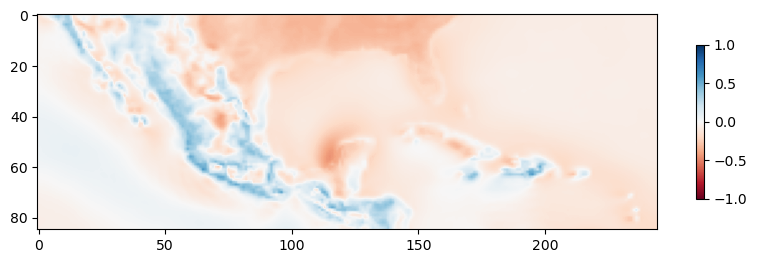

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
p = ax.imshow(spearman, vmin=-1, vmax=1, cmap="RdBu")
plt.colorbar(p, shrink=0.4)

In [11]:
spearman.min()

<xarray.DataArray ()> Size: 8B
array(-0.45396342)

In [12]:
spearman.max()

<xarray.DataArray ()> Size: 8B
array(0.57303329)